# I. Project Introduction

The electroencephalogram (EEG) is utilized to detect the electrical activity of the brain. Everyday activities such as reading, listening to music, writing and the use of technology cause changes in brain wave patterns. Proper understanding of these differences possesses a strong foundation for the understanding of how the brain processes information. Currently, the EEG is used in studies for ADHD, alzheimers, epilepsy, etc. Understanding brain wave activity could play a crucial role future studies regarding learning, cognition and memory. With the progression of technology, EEG electrodes can be engineered when a desire to conduct brain wave activity research. However, when these self engineered tools are used the reliability of the apparatus must be dependable, accurate and show the ability to produce precise data. 

The current project will be conducted to analyze the readings of the self-engineered EEG to determine if this tool can be used in a research study and produce reliable data. For the project, the researcher was the test subject and he read during one trial and listened to music during another trial. The data will be used to predict if the microvolt values obtained using the 4-channel electrode were realistic values. Moreover, a correlation for each channel during each task will be conducted to determine which task tends to result in the most brain activity. 

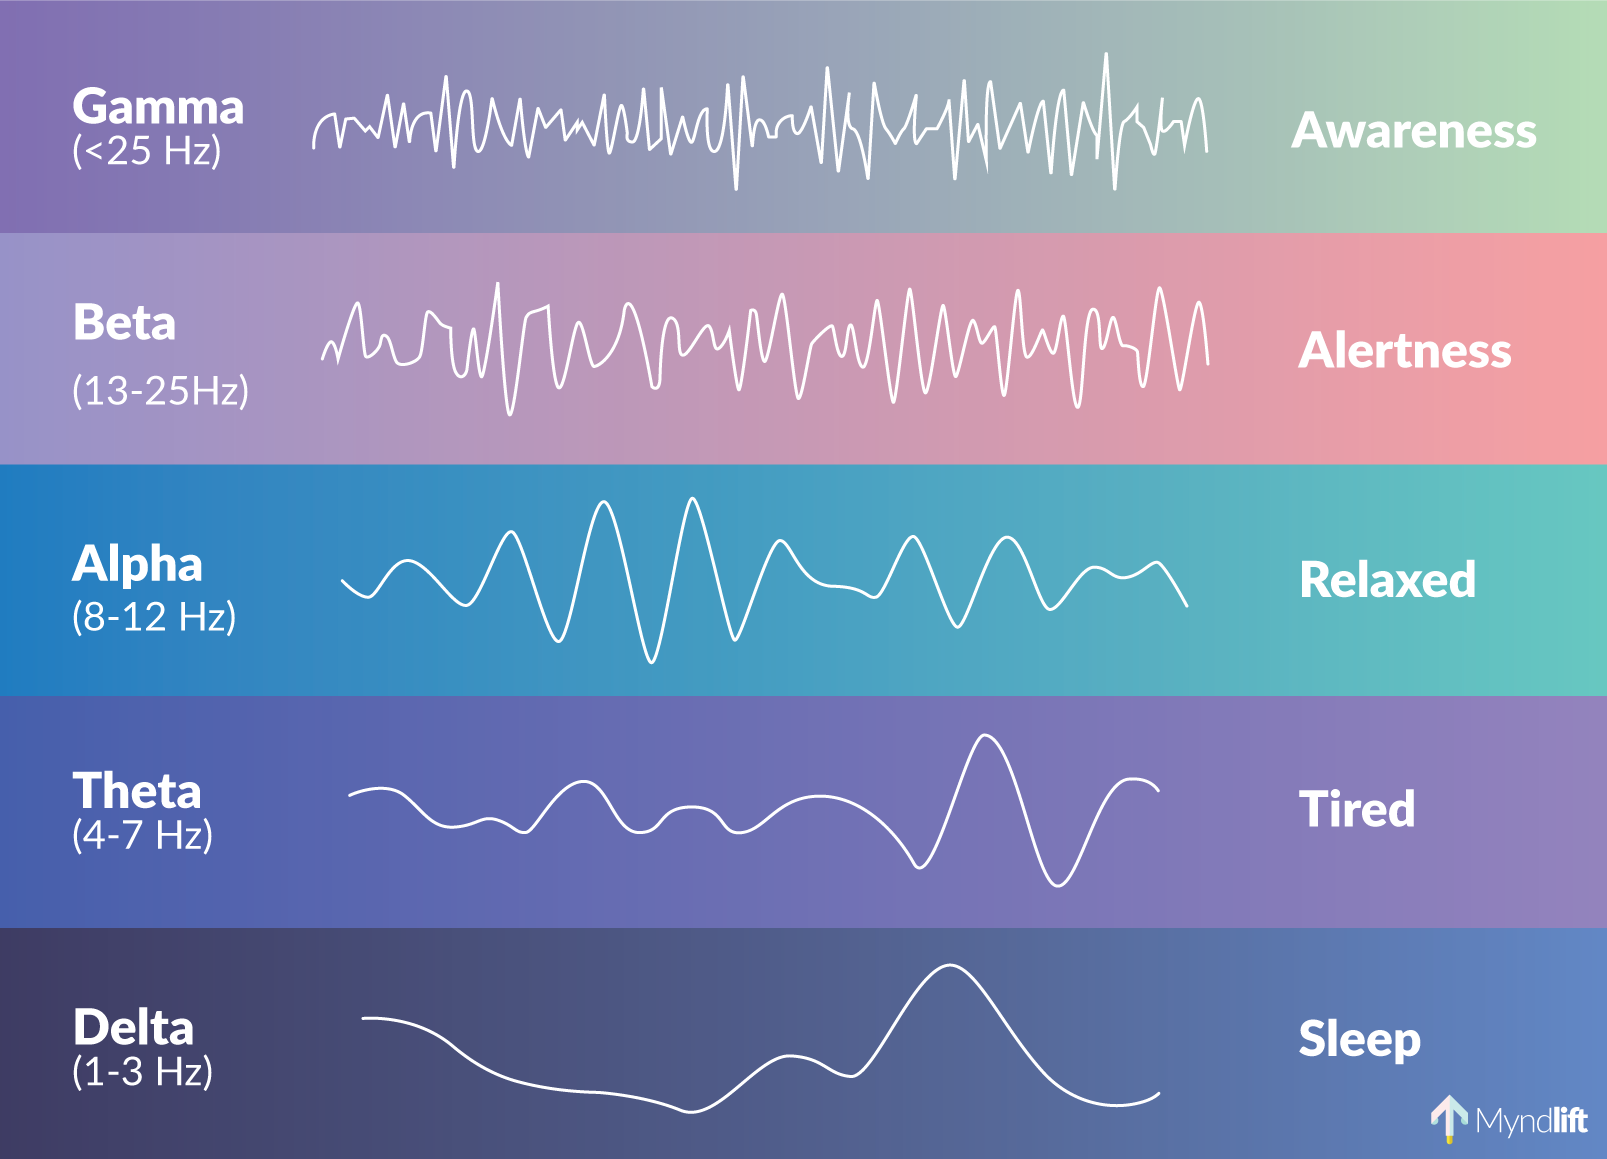

In [367]:
from IPython.display import display, Image
display(Image(filename='brainwaves.png'))


# II. Data Introduction
The data used in this notebook is free and open at:
https://www.kaggle.com/millerintllc/eeg-microexperiment

## Dataset Download
Music_EEG: https://www.kaggle.com/millerintllc/eeg-microexperiment#tiny_eeg_self_experiment_music.csv 

Reading_EEG: https://www.kaggle.com/millerintllc/eeg-microexperiment#tiny_eeg_self_experiment_reading.csv 

## Dataset Details
Donor:

Jason Miller and Light and Latitude, LLC

contact info: linkedin.com/in/jghdatasci

Data Set Information:
The music and reading EEG trials were conducted for 3-4 minutes to record the brain wave activity associated with the tasks.

 The test subject throughout various trials using the 200Hz 4-channel EEG with gold-tipped electrodes was the researcher. The other components used were a 4-channel Ganglion development board, an elastic EEG cap and both python and Open BCI software.

# III. Outline and Goals of the Project

1. The import of various packages discussed throughout the machine learning course will be uploaded to ensure all packages are available for use. 

2. Basic information about the EEG datasets will be uploaded (music, reading and music vs reading).

3. Evaluate the datasets with respect to the time of day as well as the Time in seconds in which it took to complete each task.

4. Conduct statistical analysis for the comparison of each of the four channels to each other during each task.

5. Generate a correlation heatmap between the channels for each task. 

5. Conduct a cluster report regarding the full set of data to determine which channel readings were most similar and during which task. 

# IV. Information about the EEG datasets

## 1) Data Background
A. The dataset was published on Kaggle by Jason Miller.

B. The company supporting the data is Light and Latitude, LLC. 

C. The dataset only includes one subject, the researcher.

D. The researcher streamed music on an IoT device for the music study and read scholarly articles about wave signal analysis for the reading study. 

E. The datasets include values for each of the 4 channels measured in microvolts, the acceleration of the voltage reading, and timestamp values.

## 2) Module Import

In [368]:
#import of packages for current and future analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

## 3) Dataset Import
A. Music_EEG

In [369]:
#Load Modified Music_EEG CSV file
data_musicEEG = pd.read_csv("tiny_eeg_self_experiment_music_ML.csv")
data_musicEEG.head()

,IndexId,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Ref1,Ref2,Ref3,TS1,TS2,Time of Day in Seconds
0,0,933.19,519.23,21.71,238.45,0,0,0,20:04:02,1.540000e+12,72242
1,1,932.94,516.98,22.70,251.80,0,0,0,20:04:02,1.540000e+12,72242
2,2,827.70,521.87,17.26,207.42,0,0,0,20:04:02,1.540000e+12,72242
3,3,893.26,519.82,18.90,219.49,0,0,0,20:04:02,1.540000e+12,72242
4,4,953.94,520.69,21.88,252.06,0,0,0,20:04:02,1.540000e+12,72242


B. Reading_EEG

In [370]:
#Load Modified Reading_EEG CSV file
data_readingEEG = pd.read_csv("tiny_eeg_self_experiment_reading_ML.csv")
data_readingEEG.head()

,IndexId,Channel 1R,Channel 2R,Channel 3R,Channel 4R,Ref1,Ref2,Ref3,TS1,TS2,Time of Day in Seconds
0,0,963.44,281.28,71.98,401.54,0.0,0.0,0.0,20:25:24,1.540000e+12,73524.0
1,1,1011.33,353.28,51.57,379.71,0.0,0.0,0.0,20:25:24,1.540000e+12,73524.0
2,2,979.95,321.36,107.42,440.38,0.0,0.0,0.0,20:25:24,1.540000e+12,73524.0
3,3,934.42,262.01,111.16,441.09,0.0,0.0,0.0,20:25:24,1.540000e+12,73524.0
4,4,996.12,306.95,52.48,386.58,0.0,0.0,0.0,20:25:24,1.540000e+12,73524.0


In [371]:
data_musicEEG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39647 entries, 0 to 39646
Data columns (total 11 columns):
IndexId                   39647 non-null int64
Channel 1M                39647 non-null float64
Channel 2M                39647 non-null float64
Channel 3M                39647 non-null float64
Channel 4M                39647 non-null float64
Ref1                      39647 non-null int64
Ref2                      39647 non-null int64
Ref3                      39647 non-null int64
TS1                       39647 non-null object
TS2                       39647 non-null float64
Time of Day in Seconds    39647 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.3+ MB


In [372]:
data_readingEEG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38256 entries, 0 to 38255
Data columns (total 11 columns):
IndexId                   38256 non-null int64
Channel 1R                38256 non-null float64
Channel 2R                38256 non-null float64
Channel 3R                38255 non-null float64
Channel 4R                38255 non-null float64
Ref1                      38255 non-null float64
Ref2                      38255 non-null float64
Ref3                      38255 non-null float64
TS1                       38255 non-null object
TS2                       38255 non-null float64
Time of Day in Seconds    38255 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 3.2+ MB


## 4) Music_EEG and Reading_ EEG datasets 

A. The amount of rows in the datasets are 39,647 for the Music_EEG dataset and 38,256 for the Reading_EEG dataset.

B. The datasets contain 10 columns, four of which will be used for the project: Channel 1, Channel 2, Channel 3, Channel 4. 

C. The channel data is measured with units of microvolts.

# V. Evaluation of Data

## 1) Isolation of the Channel values and Modified Time
A. Music_EEG

In [373]:
#Import music dataset file with time of day converted to seconds
data_musicEEG = pd.read_csv("tiny_eeg_self_experiment_music_ML.csv", index_col="IndexId")
data_musicEEG.drop(["Ref1", "Ref2", "Ref3", "TS1", "TS2"], axis = 1, inplace = True)
data_musicEEG.head()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Time of Day in Seconds
IndexId,,,,,
0,933.19,519.23,21.71,238.45,72242
1,932.94,516.98,22.70,251.80,72242
2,827.70,521.87,17.26,207.42,72242
3,893.26,519.82,18.90,219.49,72242
4,953.94,520.69,21.88,252.06,72242


In [374]:
data_musicEEG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39647 entries, 0 to 171
Data columns (total 5 columns):
Channel 1M                39647 non-null float64
Channel 2M                39647 non-null float64
Channel 3M                39647 non-null float64
Channel 4M                39647 non-null float64
Time of Day in Seconds    39647 non-null int64
dtypes: float64(4), int64(1)
memory usage: 1.8 MB


B. Reading_EEG

In [375]:
#Import music dataset file with time of day converted to seconds
data_readingEEG = pd.read_csv("tiny_eeg_self_experiment_reading_ML.csv", index_col="IndexId")
data_readingEEG.drop(["Ref1", "Ref2", "Ref3", "TS1", "TS2"], axis = 1, inplace = True)
data_readingEEG.head()

,Channel 1R,Channel 2R,Channel 3R,Channel 4R,Time of Day in Seconds
IndexId,,,,,
0,963.44,281.28,71.98,401.54,73524.0
1,1011.33,353.28,51.57,379.71,73524.0
2,979.95,321.36,107.42,440.38,73524.0
3,934.42,262.01,111.16,441.09,73524.0
4,996.12,306.95,52.48,386.58,73524.0


In [376]:
data_readingEEG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38256 entries, 0 to 139
Data columns (total 5 columns):
Channel 1R                38256 non-null float64
Channel 2R                38256 non-null float64
Channel 3R                38255 non-null float64
Channel 4R                38255 non-null float64
Time of Day in Seconds    38255 non-null float64
dtypes: float64(5)
memory usage: 1.8 MB


## 2) Correlation Matrices
A. Music_EEG

In [377]:
#Removal of the column for time of day in seconds for the music data 
data_musicEEG.drop(["Time of Day in Seconds"], axis = 1, inplace = True)
data_musicEEG.head()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M
IndexId,,,,
0,933.19,519.23,21.71,238.45
1,932.94,516.98,22.70,251.80
2,827.70,521.87,17.26,207.42
3,893.26,519.82,18.90,219.49
4,953.94,520.69,21.88,252.06


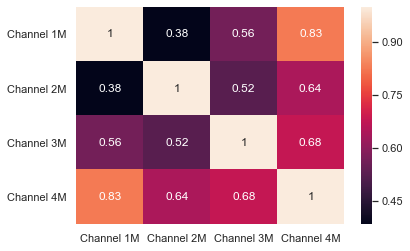

In [378]:
#Generate correlation heatmap for the music data
import seaborn as sns; sns.set()
sns.heatmap(data_musicEEG.corr(), annot=True,  vmax=1.0)

In [379]:
#Removal of the column for time of day in seconds for the reading data
data_readingEEG.drop(["Time of Day in Seconds"], axis = 1, inplace = True)
data_readingEEG.head()

,Channel 1R,Channel 2R,Channel 3R,Channel 4R
IndexId,,,,
0,963.44,281.28,71.98,401.54
1,1011.33,353.28,51.57,379.71
2,979.95,321.36,107.42,440.38
3,934.42,262.01,111.16,441.09
4,996.12,306.95,52.48,386.58


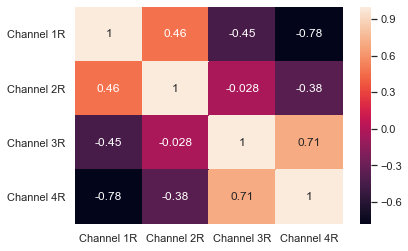

In [380]:
#Generate correlation heatmap for the reading data
import seaborn as sns; sns.set()
sns.heatmap(data_readingEEG.corr(), annot=True,  vmax=1.0)

## 3) Data Description
A. Music_EEG

In [381]:
data_musicEEG.shape

(39647, 4)

In [382]:
data_musicEEG.nunique()

Channel 1M    23588
Channel 2M    12769
Channel 3M     5603
Channel 4M    19090
dtype: int64

In [383]:
data_musicEEG.describe()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M
count,39647.000000,39647.000000,39647.000000,39647.000000
mean,811.469740,424.160944,25.675518,153.763276
std,96.160618,46.437532,14.983653,65.450350
min,3.450000,17.040000,0.000000,1.020000
25%,734.770000,395.465000,14.700000,107.170000
50%,812.780000,410.980000,25.150000,150.110000
75%,886.965000,442.360000,35.960000,197.085000
max,1391.010000,1171.090000,317.740000,793.010000


B. Reading_EEG

In [384]:
data_readingEEG.shape

(38256, 4)

In [385]:
data_readingEEG.nunique()

Channel 1R    18156
Channel 2R    17045
Channel 3R    15410
Channel 4R    20706
dtype: int64

In [386]:
data_readingEEG.describe()

,Channel 1R,Channel 2R,Channel 3R,Channel 4R
count,38256.000000,38256.00000,38255.000000,38255.000000
mean,885.714737,260.91203,110.181319,557.736782
std,57.988815,98.49802,59.038638,74.022338
min,260.870000,56.34000,8.140000,0.330000
25%,843.687500,210.08750,62.540000,505.525000
50%,883.750000,263.00500,109.880000,559.520000
75%,928.190000,304.56250,157.955000,612.470000
max,1843.480000,4461.71000,1536.930000,1421.000000


# Data Analysis

## 1) Histograms
A. Music_EEG

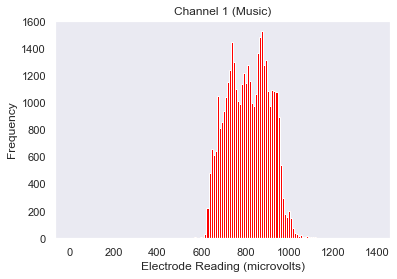

In [387]:
#Histogram of Channel 1 Music_EEG
Channel1M = data_music_vs_reading_EEG['Channel 1M']
plt.hist(Channel1M, 150, facecolor='red')
plt.title('Channel 1 (Music)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

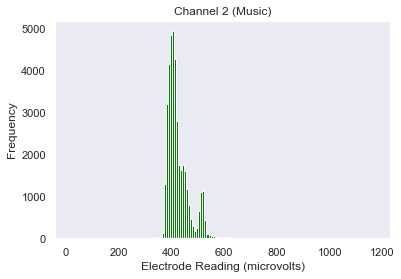

In [388]:
#Histogram of Channel 2 Music_EEG
Channel2M = data_music_vs_reading_EEG['Channel 2M']
plt.hist(Channel2M, 150, facecolor='green')
plt.title('Channel 2 (Music)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

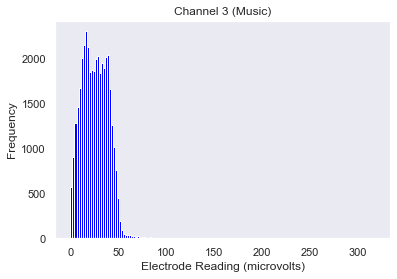

In [389]:
#Histogram of Channel 3 Music_EEG
Channel3M = data_music_vs_reading_EEG['Channel 3M']
plt.hist(Channel3M, 150, facecolor='blue')
plt.title('Channel 3 (Music)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

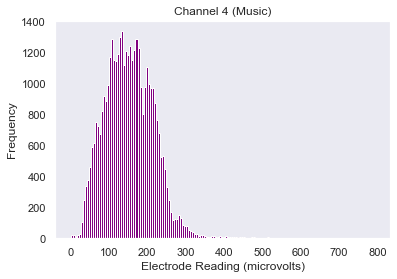

In [390]:
#Histogram of Channel 4 Music_EEG
Channel4M = data_music_vs_reading_EEG['Channel 4M']
plt.hist(Channel4M, 150, facecolor='purple')
plt.title('Channel 4 (Music)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

B. Reading_EEG

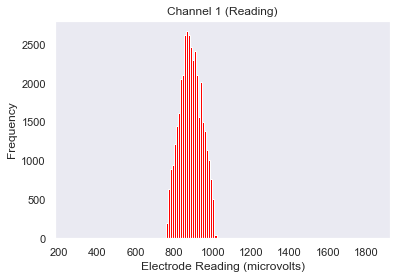

In [395]:
#Histogram of Channel 1 Reading_EEG
Channel1R = data_music_vs_reading_EEG['Channel 1R']
plt.hist(Channel1R, 150, facecolor='red')
plt.title('Channel 1 (Reading)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

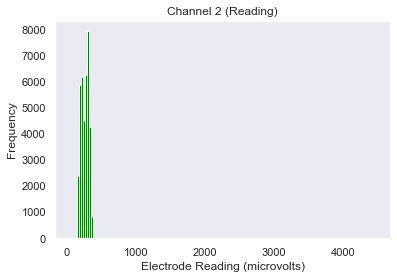

In [392]:
#Histogram of Channel 2 Reading_EEG
Channel2R = data_music_vs_reading_EEG['Channel 2R']
plt.hist(Channel2R, 150, facecolor='green')
plt.title('Channel 2 (Reading)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

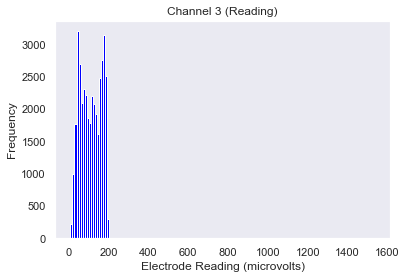

In [393]:
#Histogram of Channel 3 Reading_EEG
Channel3R = data_music_vs_reading_EEG['Channel 3R']
plt.hist(Channel3R, 150, facecolor='blue')
plt.title('Channel 3 (Reading)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

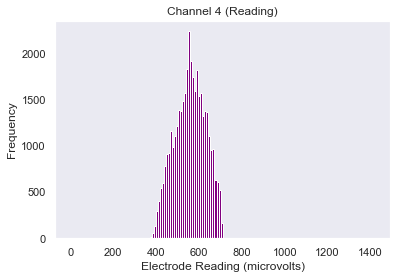

In [394]:
#Histogram of Channel 4 Reading_EEG
Channel4R = data_music_vs_reading_EEG['Channel 4R']
plt.hist(Channel4R, 150, facecolor='purple')
plt.title('Channel 4 (Reading)')
plt.xlabel('Electrode Reading (microvolts)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# 2) Scatter Plots
A. Music_EEG

In [408]:
#Remove unwanted columns and generate scatterplots from uploaded dataframe file
df_musicEEG = pd.read_csv("tiny_eeg_self_experiment_music_ML.csv", index_col="IndexId")
df_musicEEG.drop(["Ref1", "Ref2", "Ref3", "TS1", "TS2"], axis = 1, inplace = True)
df_musicEEG

,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Time of Day in Seconds
IndexId,,,,,
0,933.19,519.23,21.71,238.45,72242
1,932.94,516.98,22.70,251.80,72242
2,827.70,521.87,17.26,207.42,72242
3,893.26,519.82,18.90,219.49,72242
4,953.94,520.69,21.88,252.06,72242
5,848.79,519.20,18.79,224.68,72242
6,845.51,516.32,24.37,207.32,72242
7,951.85,522.06,22.15,251.08,72242
8,894.98,525.64,21.90,241.74,72242


<Figure size 10800x10800 with 0 Axes>

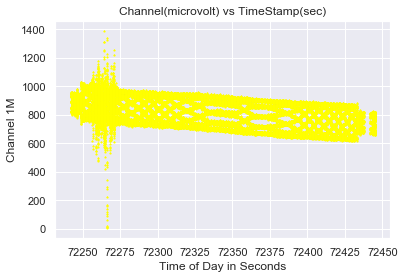

<Figure size 10800x10800 with 0 Axes>

In [415]:
#Scatterplot of Channel 1 Music_EEG
df_musicEEG.plot.scatter(x=int(4), y=int(0), s=4, c='yellow', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

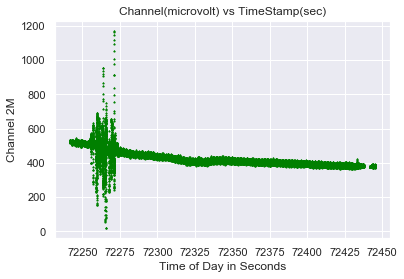

<Figure size 10800x10800 with 0 Axes>

In [416]:
#Scatterplot of Channel 2 Music_EEG
df_musicEEG.plot.scatter(x=int(4), y=int(1), s=4, c='green', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

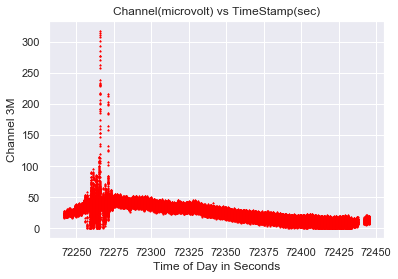

<Figure size 10800x10800 with 0 Axes>

In [417]:
#Scatterplot of Channel 3 Music_EEG
df_musicEEG.plot.scatter(x=int(4), y=int(2), s=4, c='red', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

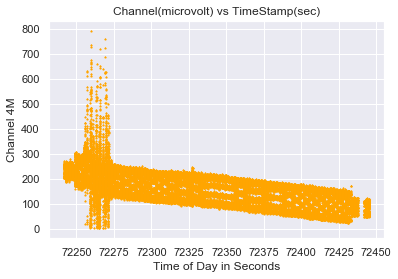

<Figure size 10800x10800 with 0 Axes>

In [412]:
#Scatterplot of Channel 4 Music_EEG
df_musicEEG.plot.scatter(x=int(4), y=int(3), s=4, c='orange', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

B. Reading_EEG

In [413]:
#Remove unwanted columns and generate scatterplots from uploaded dataframe file
df_readingEEG = pd.read_csv("tiny_eeg_self_experiment_reading_ML.csv", index_col="IndexId")
df_readingEEG.drop(["Ref1", "Ref2", "Ref3", "TS1", "TS2"], axis = 1, inplace = True)
data_readingEEG

,Channel 1R,Channel 2R,Channel 3R,Channel 4R
IndexId,,,,
0,963.44,281.28,71.98,401.54
1,1011.33,353.28,51.57,379.71
2,979.95,321.36,107.42,440.38
3,934.42,262.01,111.16,441.09
4,996.12,306.95,52.48,386.58
5,1004.17,334.47,86.05,419.24
6,950.03,281.23,120.18,444.21
7,969.08,302.25,68.74,394.68
8,1002.34,324.99,82.69,412.16


<Figure size 10800x10800 with 0 Axes>

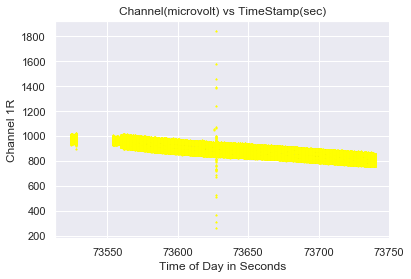

<Figure size 10800x10800 with 0 Axes>

In [418]:
#Scatterplot of Channel 1 Reading_EEG
df_readingEEG.plot.scatter(x=int(4), y=int(0), s=4, c='yellow', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

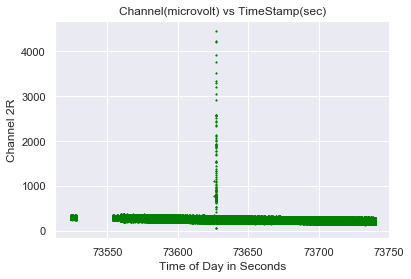

<Figure size 10800x10800 with 0 Axes>

In [420]:
#Scatterplot of Channel 2 Reading_EEG
df_readingEEG.plot.scatter(x=int(4), y=int(1), s=4, c='green', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

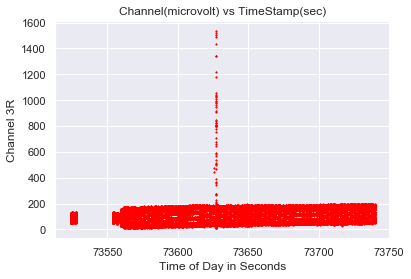

<Figure size 10800x10800 with 0 Axes>

In [421]:
#Scatterplot of Channel 3 Reading_EEG
df_readingEEG.plot.scatter(x=int(4), y=int(2), s=4, c='red', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

<Figure size 10800x10800 with 0 Axes>

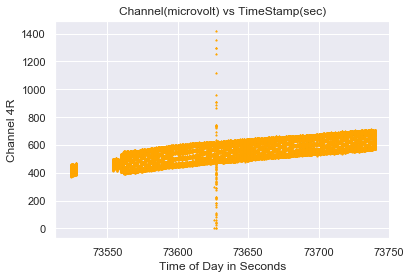

<Figure size 10800x10800 with 0 Axes>

In [422]:
#Scatterplot of Channel 4 Reading_EEG
df_readingEEG.plot.scatter(x=int(4), y=int(3), s=4, c='orange', marker = "1")
plt.title("Channel(microvolt) vs TimeStamp(sec)")
plt.figure(figsize=(150,150))

# Comparison of Reading EEG data vs Music EEG data

In [237]:
#Load Modified Music_EEG vs Reading_EEG CSV file
data_music_vs_reading_EEG = pd.read_csv("tiny_eeg_self_experiment_music_vs_reading_ML.csv")
data_music_vs_reading_EEG.head()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Channel 1R,Channel 2R,Channel 3R,Channel 4R
0,933.19,519.23,21.71,238.45,963.44,281.28,71.98,401.54
1,932.94,516.98,22.70,251.80,1011.33,353.28,51.57,379.71
2,827.70,521.87,17.26,207.42,979.95,321.36,107.42,440.38
3,893.26,519.82,18.90,219.49,934.42,262.01,111.16,441.09
4,953.94,520.69,21.88,252.06,996.12,306.95,52.48,386.58


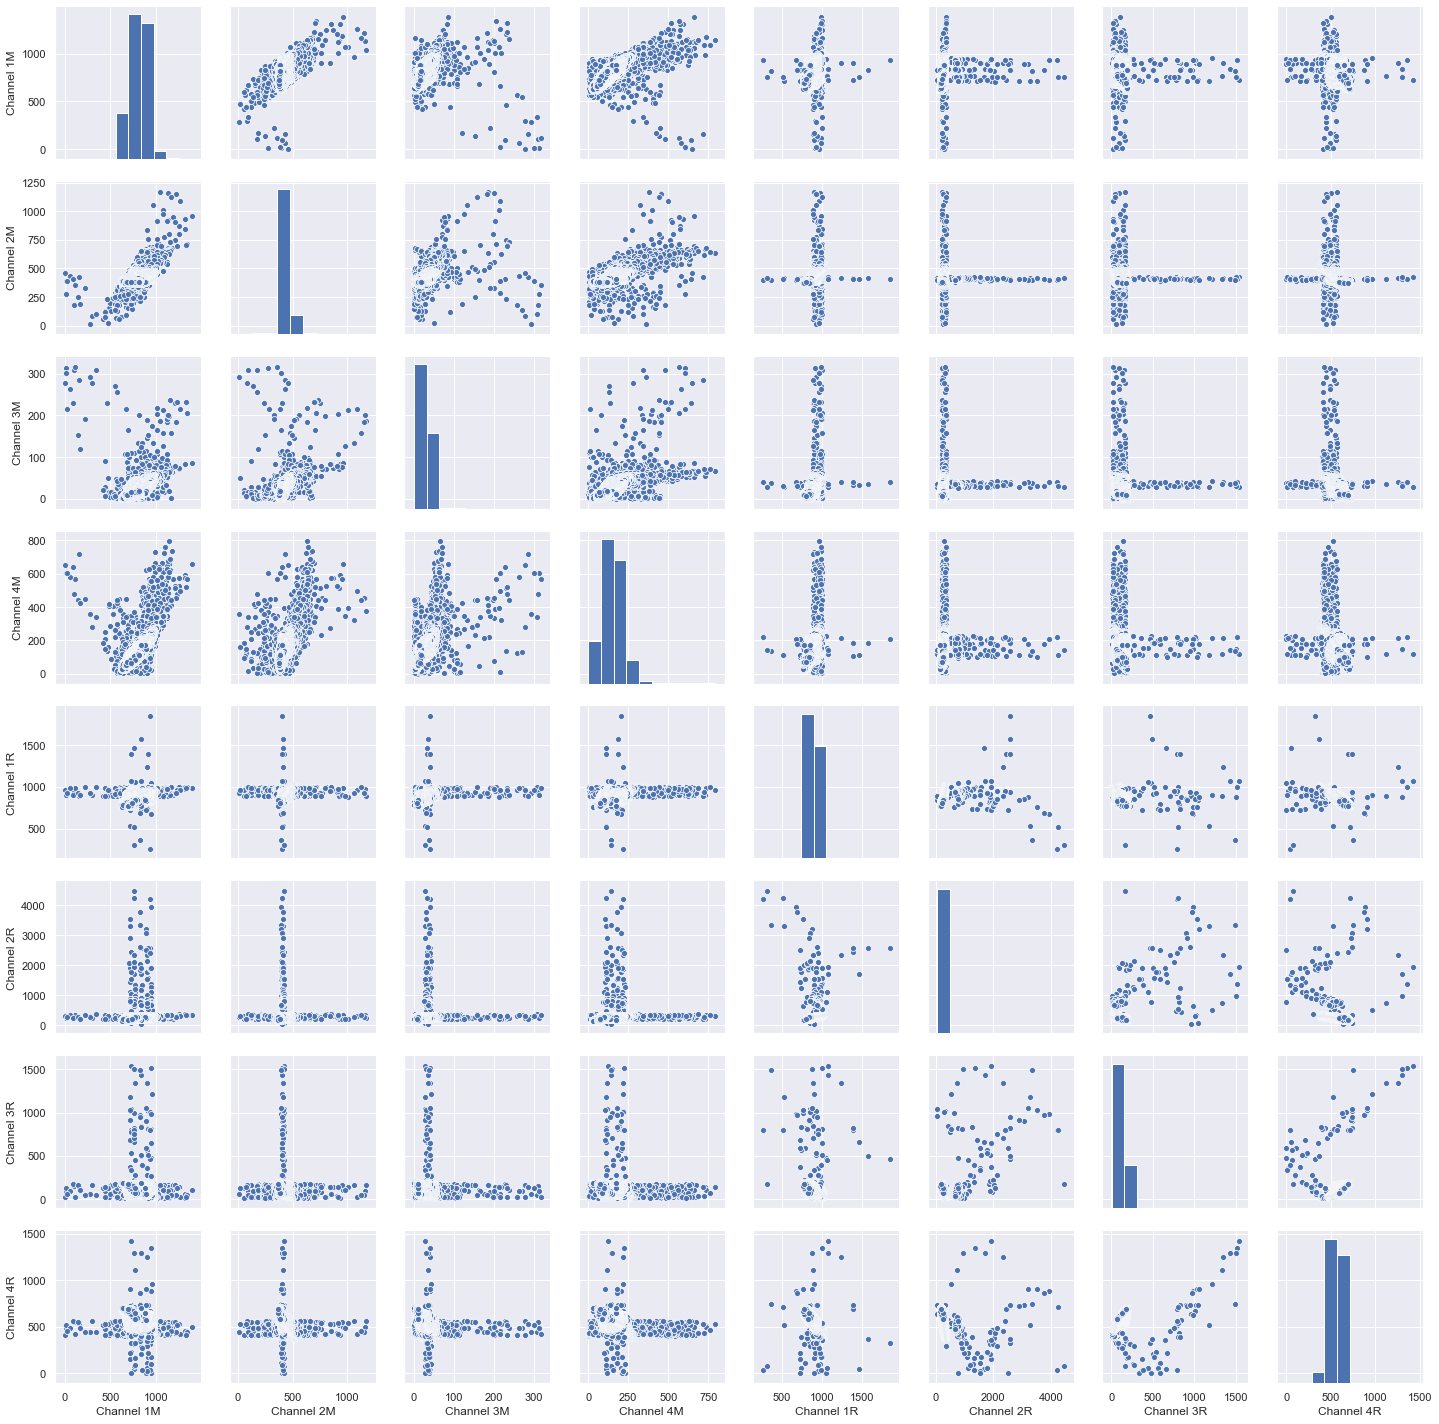

In [423]:
#application of pair plot command for comparative analysis between channels in each task
sns.pairplot(data_music_vs_reading_EEG, hue=None)

# Reading vs Music EEG Heatmap Correlation

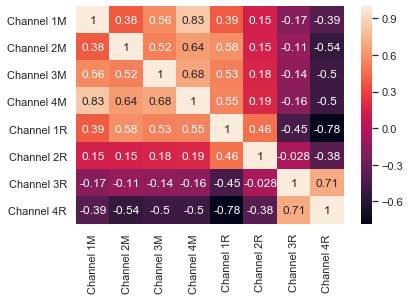

In [424]:
#Heatmap of Channel value comparison during mutually exclusive tasks: reading trials and music trials
import seaborn as sns; sns.set()
sns.heatmap(data_music_vs_reading_EEG.corr(), annot=True,  vmax=1.0)

In [428]:
#Load Modified Music_EEG vs Reading_EEG with Time converted to seconds CSV file
data_music_vs_reading_EEG1 = pd.read_csv("tiny_eeg_self_experiment_music_vs_reading_ML_1.csv")
data_music_vs_reading_EEG1.drop(["Time"], axis = 1, inplace = True)
data_music_vs_reading_EEG1.head()

,Channel 1M,Channel 2M,Channel 3M,Channel 4M,Channel 1R,Channel 2R,Channel 3R,Channel 4R
0,933.19,519.23,21.71,238.45,963.44,281.28,71.98,401.54
1,932.94,516.98,22.70,251.80,1011.33,353.28,51.57,379.71
2,827.70,521.87,17.26,207.42,979.95,321.36,107.42,440.38
3,893.26,519.82,18.90,219.49,934.42,262.01,111.16,441.09
4,953.94,520.69,21.88,252.06,996.12,306.95,52.48,386.58


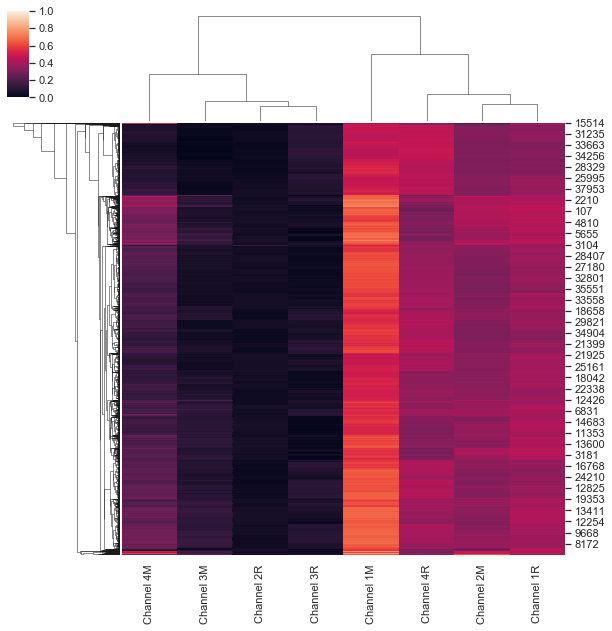

In [429]:
#Plot a Clustermap using sns command to determine similarity amongst channel values
sns.clustermap(data_music_vs_reading_EEG1, standard_scale=1, col_cluster=True)